<a href="https://colab.research.google.com/github/jon-nowacki/MachineLearning/blob/main/MachineLearning/k-means_clustering/K_Means_Multi_Dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Multi Dimension

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import os

output = 'output'

# Check if the directory already exists
if not os.path.exists(output):
    try:
        os.mkdir(output)
    except OSError as error:
        print(error)
else:
    print(f"The directory '{output}' already exists.")

# You can download the file using requests library
import requests

The directory 'output' already exists.


In [34]:
output = 'output'
try:
    os.mkdir(output)
except OSError as error:
    print(error)

"""
URL ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv'

filename ="Cust_Segmentation.csv"

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f: # write binary mode
            f.write(await response.bytes())

asyncio.run(download(URL, "Cust_Segmentation.csv"))
"""

cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

# Preprocessing
# "Address" in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to
# categorical variables because the Euclidean distance function isn't really meaningful for discrete variables.
# So, let's drop this feature and run clustering.
df = cust_df.drop('Address', axis=1)
df.head()


[Errno 17] File exists: 'output'


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [35]:

from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
#print(labels)

df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


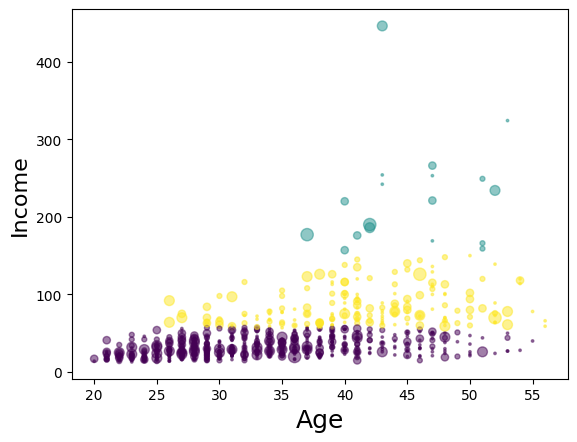

In [36]:
df.groupby('Clus_km').mean()

area = np.pi * ( X[:, 1])**2
#plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5) # Gets warnings
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.savefig(output + '/k-means_2a.png')

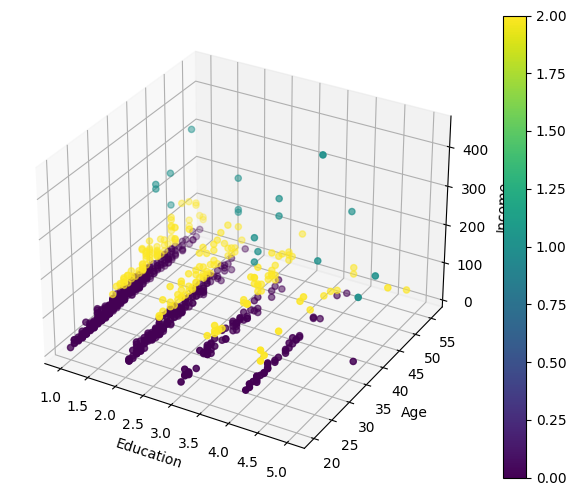

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

#scatter = ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(np.float)) # this causes a warning
scatter = ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(float))
plt.colorbar(scatter)  # Adding a colorbar to show the legend

plt.savefig(output + '/k-means_2b.png')

### Broken code:

Sometimes, setting the viewing angle (elev and azim) or using the rect argument incorrectly can result in a blank plot. The previous code creates a 3D scatter plot without explicitly setting the viewing angles.

* elev
* azim
* rect

```
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) # elev, azim can break the code.

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))
plt.savefig(output + '/k-means_2b.png')
```

```
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=-60) # elev, azim can break the code.

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))
plt.savefig(output + '/k-means_2b.png')
```

In [38]:
# Assuming you've already created a 3D axis object 'ax'

current_elev = ax.elev
current_azim = ax.azim

print(f"Current Elevation Angle: {current_elev}")
print(f"Current Azimuthal Angle: {current_azim}")

Current Elevation Angle: 30
Current Azimuthal Angle: -60
